In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
#import sql
import sqlite3
# Create an in-memory database connection (data is lost when the session ends)
conn = sqlite3.connect(':memory:')

In [3]:
#read the csv file
df=pd.read_csv('creditcard.csv')

In [4]:
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Get the number of data rows (excluding the header)
row_count = len(df)
print (f"the csv file has {row_count} are there in this file ")

the csv file has 284807 are there in this file 


In [6]:
print("Shape:", df.shape)
print(df['Class'].value_counts())

Shape: (284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


Preprocessing + Handling Imbalance


In [7]:
X= df.drop('Class', axis=1)
y= df['Class']

#scaling for the time and amount
scaler = StandardScaler()
X[['Time', 'Amount']] = scaler.fit_transform(X[['Time', 'Amount']])

#training test split
X_train, X_test, y_train, y_test = train_test_split( X,y,test_size=0.2, stratify=y, random_state=42)

#handling Imbalance Using SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)




MACHINE LEARNING MODELS



*   LOGISTIC REGRESSION




In [8]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [9]:
from sklearn.metrics import roc_auc_score
logreg= LogisticRegression(class_weight="balanced", max_iter=2000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score (y_test, y_pred_logreg))
print("ROC_AUC:", roc_auc_score(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9754748779888347
ROC_AUC: 0.9469703223157581




*   RANDOM FOREST



In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight="balanced",
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RANDOM FOREST RESULTS")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))


RANDOM FOREST RESULTS
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.98      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8826266824962962




*   XGBOOST



In [11]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    scale_pos_weight=len(y_train)/sum(y_train),
    eval_metrics='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [21:14:06] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "eval_metrics", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


DEEP LEARNIGN MODELS



*   ARTIFICIAL NEURAL NETWORKS (ANN)



In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

ann = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

ann.fit(X_train_resampled, y_train_resampled, epochs =10, batch_size=2048, validation_split=0.2)

y_pred_ann=(ann.predict(X_test)>0.5).astype("int32")

print("ANN RESULTS")
print(classification_report(y_test, y_pred_ann))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7972 - loss: 0.4822 - val_accuracy: 0.9190 - val_loss: 0.1521
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9553 - loss: 0.1165 - val_accuracy: 0.9491 - val_loss: 0.1146
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9672 - loss: 0.0855 - val_accuracy: 0.9685 - val_loss: 0.0865
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9741 - loss: 0.0684 - val_accuracy: 0.9789 - val_loss: 0.0690
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9795 - loss: 0.0582 - val_accuracy: 0.9849 - val_loss: 0.0501
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9835 - loss: 0.0486 - val_accuracy: 0.9897 - val_loss: 0.0381
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9869 - loss: 0.0390 - val_accuracy: 0.9928 - val_loss: 0.0312
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9893 - loss: 0.0346 - val_accuracy: 0



*   CNN(1D CONVOLUTION)



In [13]:
X_train_cnn = np.array(X_train_resampled).reshape(X_train_resampled.shape[0], X_train_resampled.shape[1], 1)
X_test_cnn = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

from tensorflow.keras.layers import Conv1D, GlobalMaxPool1D

cnn = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1],1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPool1D(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

cnn.fit(X_train_cnn, y_train_resampled,epochs=10, batch_size=2048, validation_split=0.2)

y_pred_cnn = (cnn.predict(X_test_cnn) > 0.5).astype("int32")

print("CNN RESULTS")
print(classification_report(y_test, y_pred_cnn))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.8851 - loss: 0.3379 - val_accuracy: 0.8696 - val_loss: 0.2698
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9500 - loss: 0.1383 - val_accuracy: 0.9049 - val_loss: 0.1835
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9648 - loss: 0.0946 - val_accuracy: 0.9298 - val_loss: 0.1584
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9741 - loss: 0.0746 - val_accuracy: 0.9551 - val_loss: 0.1088
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9799 - loss: 0.0609 - val_accuracy: 0.9725 - val_loss: 0.0687
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9834 - loss: 0.0510 - val_accuracy: 0.9781 - val_loss: 0.0581
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9839 - loss: 0.0505 - val_accuracy: 0.9786 - val_loss: 0.0571
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9877 - loss: 0.0410 - val_accuracy: 0



*   RNN or LSTM



In [14]:
from tensorflow.keras.layers import LSTM

X_train_rnn = X_train_cnn
X_test_rnn = X_test_cnn

lstm = Sequential([
    LSTM(64, input_shape=(X_train_rnn.shape[1],1)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')])

lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

lstm.fit(X_train_rnn,y_train_resampled, epochs=10, batch_size=2048, validation_split=0.2)

y_pred_lstm =(lstm.predict(X_test_rnn)>0.5).astype("int32")

print("LSTM RESULTS")
print(classification_report(y_test, y_pred_lstm))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8813 - loss: 0.3802 - val_accuracy: 0.8557 - val_loss: 0.3538
Epoch 2/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9446 - loss: 0.1729 - val_accuracy: 0.8767 - val_loss: 0.2272
Epoch 3/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9497 - loss: 0.1363 - val_accuracy: 0.9158 - val_loss: 0.1620
Epoch 4/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9615 - loss: 0.1033 - val_accuracy: 0.9434 - val_loss: 0.1253
Epoch 5/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9706 - loss: 0.0803 - val_accuracy: 0.9534 - val_loss: 0.1060
Epoch 6/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9771 - loss: 0.0632 - val_accuracy: 0.9627 - val_loss: 0.0879
Epoch 7/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9809 - loss: 0.0506 - val_accuracy: 0.9753 - val_loss: 0.0608
Epoch 8/10
178/178 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9850 - loss: 0.0412 - val_accu

In [15]:
y_pred=(cnn.predict(X_test_cnn)>0.5).astype(int)
y_prob = cnn.predict(X_test_cnn) #probability scores for ROC / PR curves


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


CONFUSION MATRIX, PRECISION, RECALL, F1, ROC-AUC, PR CURVES

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve,precision_recall_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

#converting
y_pred = y_pred.flatten()
y_prob = y_prob.flatten()

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.89      0.15        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962

ROC-AUC Score: 0.9648492679992648


CONFUSION MATRIX

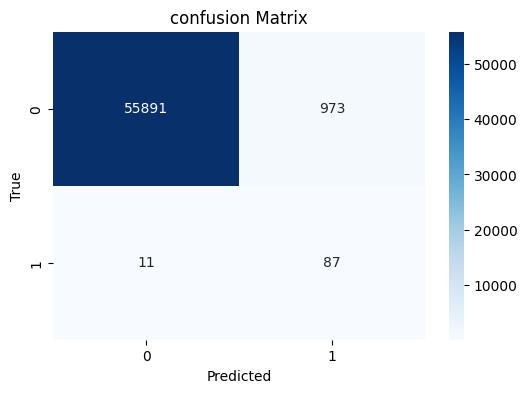

In [17]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title("confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

ROC CURVE

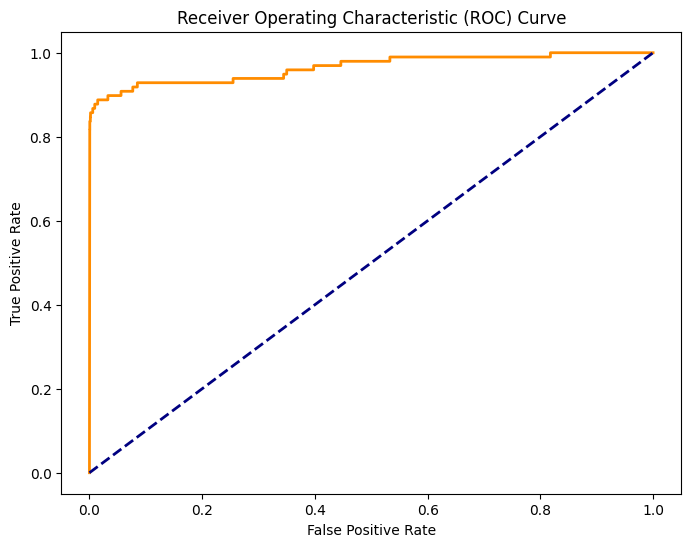

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc= auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

Precision Recall Curve

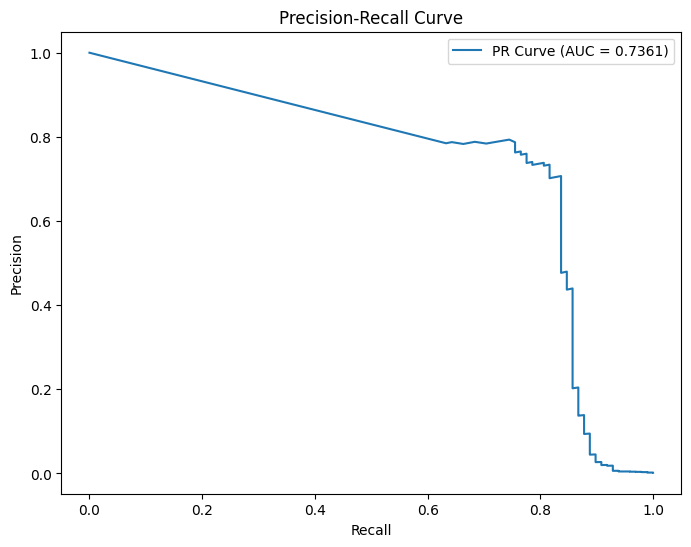

In [19]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
pr_auc= auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label="PR Curve (AUC = {:.4f})".format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()